## JURNAL PCD MODUL 2 ( EKUALISASI dan SPESIFIKASI HISTOGRAM)

# Import Library 

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import matplotlib.image as mpimg
import cv2 as cv
import pandas as pd

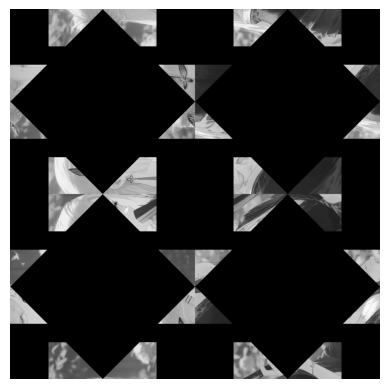

In [2]:
img_1 = plt.imread("Res/senheScramble.jpg") #2
plt.imshow(img_1, cmap='gray')
plt.axis("off")
plt.show()

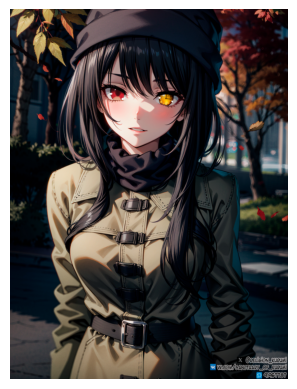

In [3]:
img_2 = plt.imread("Res/kurumi.jpg") #3
plt.imshow(img_2)
plt.axis("off")
plt.show()

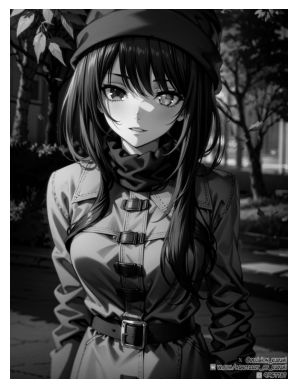

In [4]:
gray_img_2 = cv.cvtColor(img_2, cv.COLOR_BGR2GRAY) #4
plt.imshow(gray_img_2, cmap='gray')
height_2, width_2 = gray_img_2.shape
plt.axis("off")
plt.show()

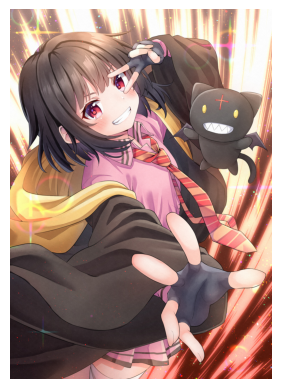

In [5]:
img_3 = plt.imread("Res/megumin.jpg") #5
plt.imshow(img_3)
plt.axis("off")
plt.show()

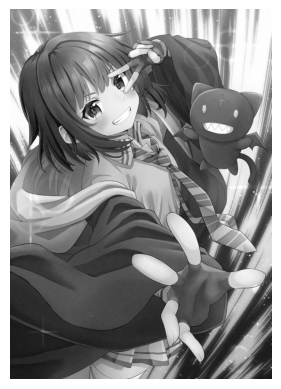

In [6]:
gray_img_3 = cv.cvtColor(img_3, cv.COLOR_BGR2GRAY) #6
plt.imshow(gray_img_3, cmap='gray')
height_3, width_3 = gray_img_3.shape
plt.axis("off")
plt.show()

In [7]:
def split_image(image, row_sizes, col_sizes): #7
    fragments = []

    for i in range(1, len(row_sizes)):
        for j in range(1, len(col_sizes)):
            chunk = image[sum(row_sizes[1:i]):sum(row_sizes[1:i+1]), sum(col_sizes[1:j]):sum(col_sizes[1:j+1])]
            fragments.append(chunk)

    return fragments

row_sizes_1 = [0, 256, 256, 256, 256, 256, 256, 256, 256] 
col_sizes_1 = [0, 1026, 1026]
fragments_1 = split_image(img_1, row_sizes_1, col_sizes_1)


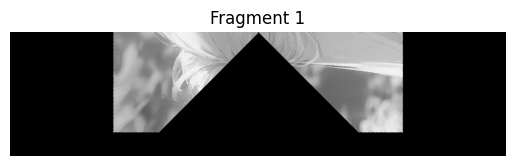

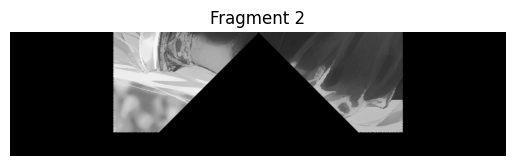

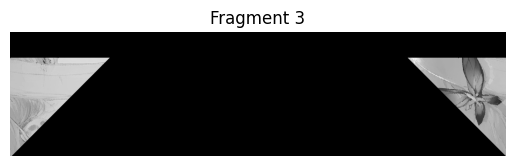

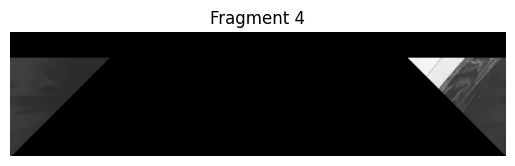

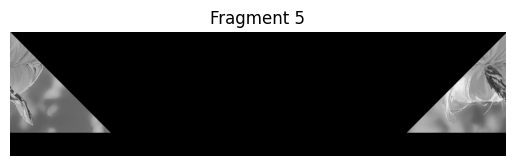

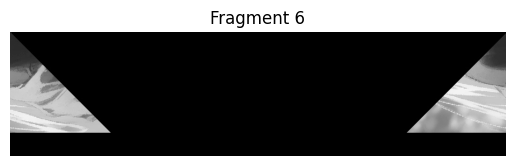

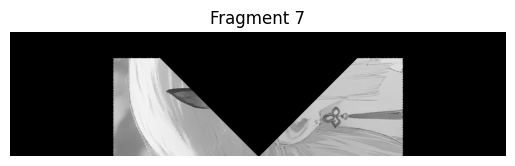

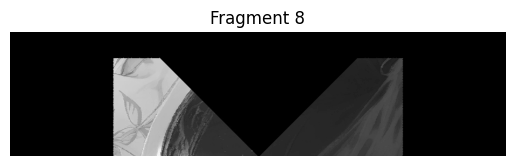

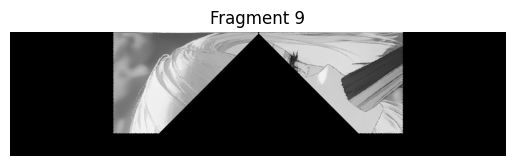

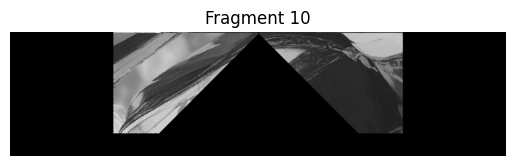

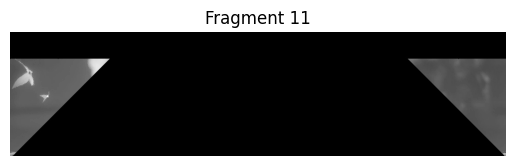

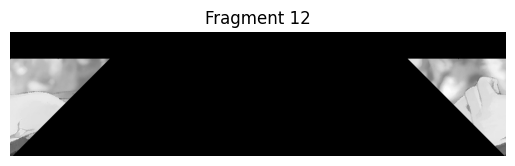

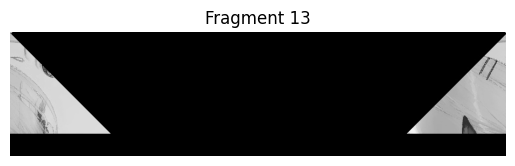

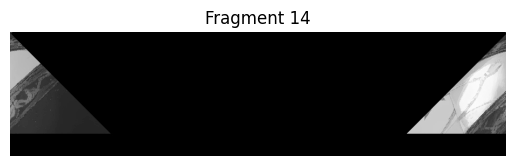

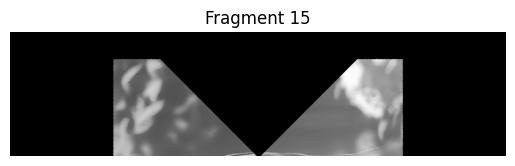

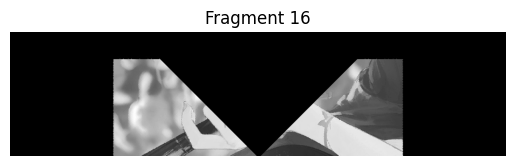

In [8]:
for i in range(len(fragments_1)): #8
    plt.imshow(fragments_1[i], cmap='gray')
    plt.title(f"Fragment {i + 1}")
    plt.axis("off")
    plt.show()

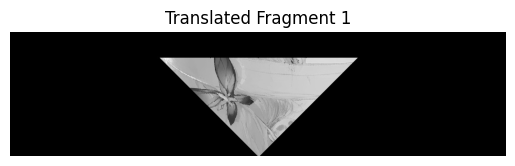

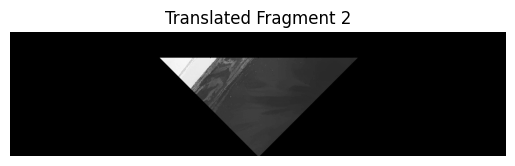

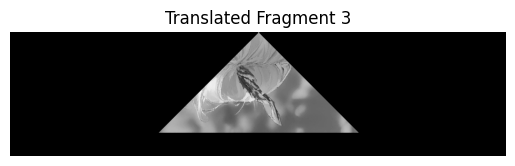

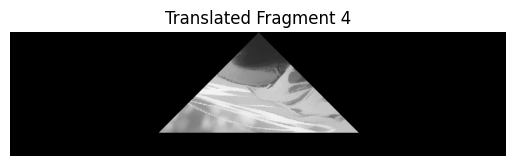

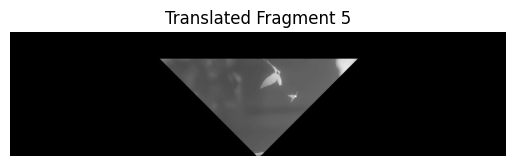

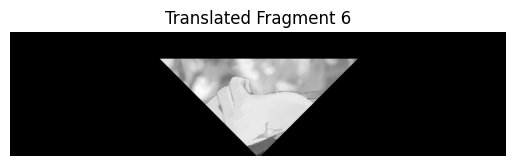

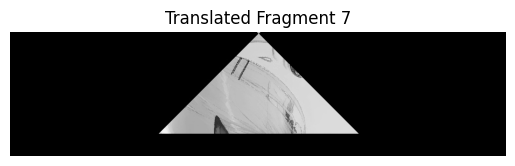

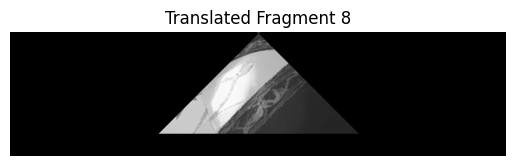

In [9]:
def translation_img(image, x=0, y=0): #9
    height, width = image.shape
    result = np.zeros((height, width))
    for i in range(height):
        for j in range(width):
            result[i, j] = image[i - y, j - x]
    return result

translated_results = []

translated_results.append(translation_img(fragments_1[2], 513, 0))
translated_results.append(translation_img(fragments_1[3], 513, 0))
translated_results.append(translation_img(fragments_1[4], 513, 0))
translated_results.append(translation_img(fragments_1[5], 513, 0))
translated_results.append(translation_img(fragments_1[10], 513, 0))
translated_results.append(translation_img(fragments_1[11], 513, 0))
translated_results.append(translation_img(fragments_1[12], 513, 0))
translated_results.append(translation_img(fragments_1[13], 513, 0))

for i in range(len(translated_results)):
    plt.imshow(translated_results[i], cmap='gray')
    plt.title(f"Translated Fragment {i + 1}")
    plt.axis("off")
    plt.show()

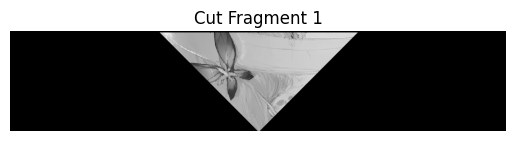

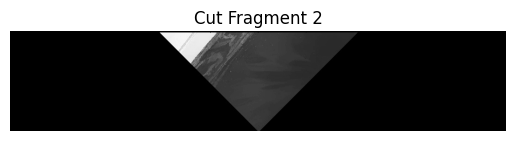

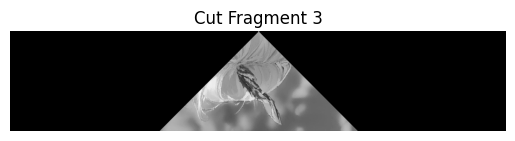

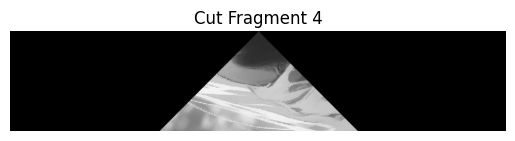

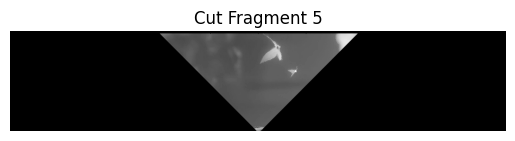

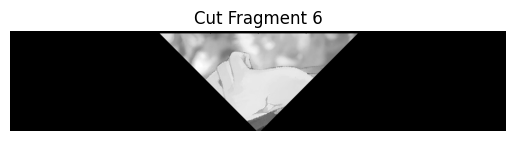

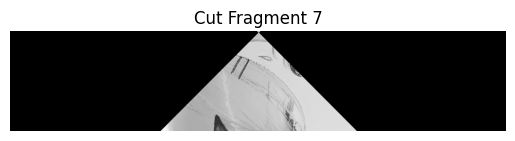

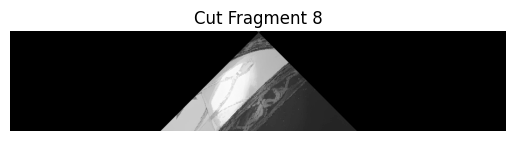

In [10]:
cut_results = [] #10

for i in range(len(translated_results)):
    piece = translated_results[i]
    if 0 <= i < 2 or 4 <= i < 6:
        piece2 = piece[50: , : ]
    else:
        piece2 = piece[ :-50, : ]
    cut_results.append(piece2)
    
for i in range(len(cut_results)):
    plt.imshow(cut_results[i], cmap='gray')
    plt.title(f"Cut Fragment {i + 1}")
    plt.axis("off")
    plt.show()

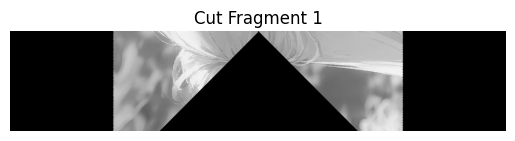

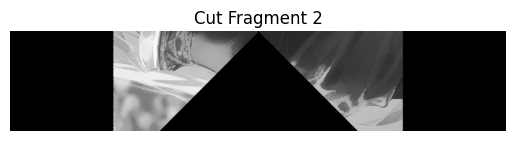

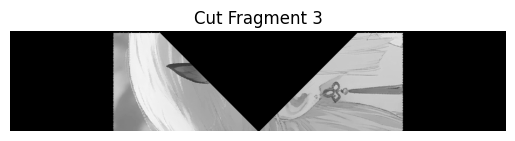

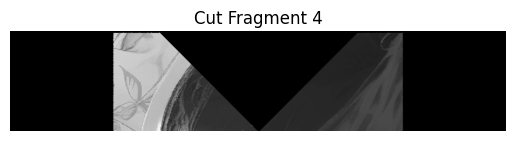

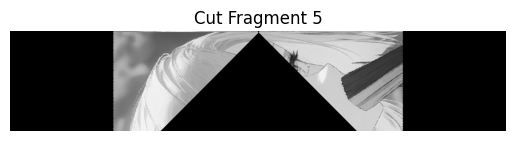

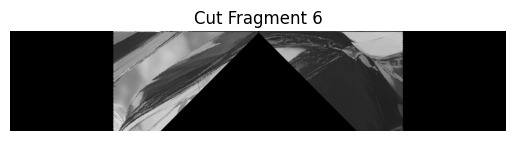

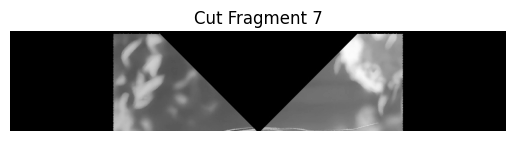

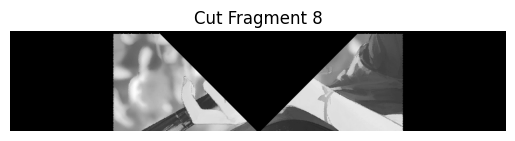

In [11]:
cut_results_2 = [] #11

for i in range(2):
    temp = fragments_1[i][:-50]
    cut_results_2.append(temp)

for i in range(6, 10):
    if i < 8:
        temp = fragments_1[i][50:]
    else:
        temp = fragments_1[i][:-50]
    cut_results_2.append(temp)

for i in range(14, 16):
    temp = fragments_1[i][50:]
    cut_results_2.append(temp)

for i in range(len(cut_results_2)):
    plt.imshow(cut_results_2[i], cmap='gray')
    plt.title(f"Cut Fragment {i + 1}")
    plt.axis("off")
    plt.show()


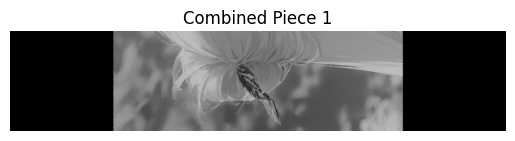

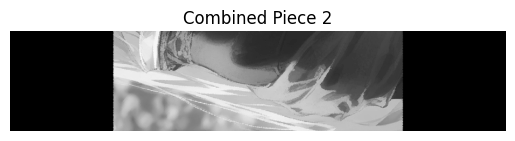

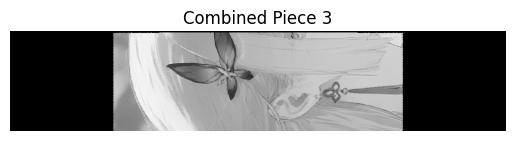

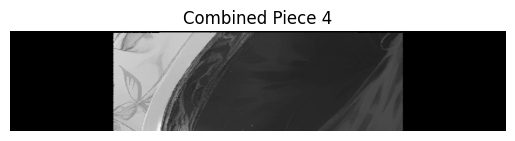

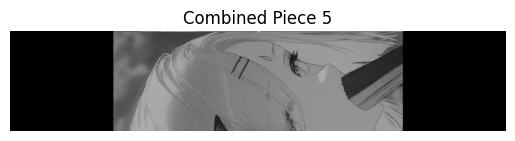

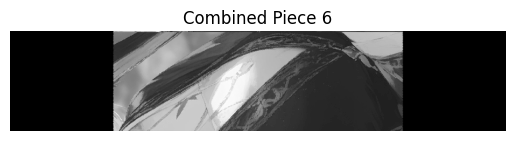

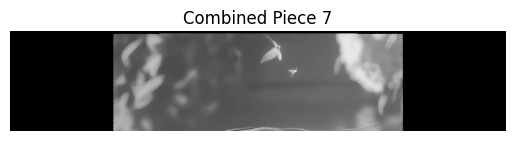

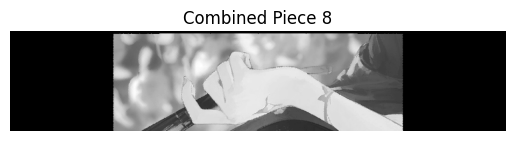

In [12]:
final_results = [] #12

for i in range(8):
    canvas = np.zeros(cut_results[i].shape)
    if i == 2:
        piece = cut_results[0] + cut_results_2[2]
    elif i == 3:
        piece = cut_results[1] + cut_results_2[3]
    elif i == 6:
        piece = cut_results[4] + cut_results_2[6]
    elif i == 7:
        piece = cut_results[5] + cut_results_2[7]
    else:
        piece = cut_results[(i + 10) % 8] + cut_results_2[i]
    final_results.append(piece)

for i in range(len(final_results)):
    plt.imshow(final_results[i], cmap='gray')
    plt.title(f"Combined Piece {i + 1}")
    plt.axis("off")
    plt.show()

In [13]:
def rotation_img(image, degree=0): #13
    height, width = image.shape
    result = np.zeros((height,width))
    radian =  np.pi * (degree / 180)
    for i in range(height):
        for j in range(width):
            new_x = int((i-height/2) * np.cos(radian) - (j-width/2) * np.sin(radian) + height/2)
            new_y = int((i-height/2) * np.sin(radian) + (j-width/2) * np.cos(radian) + width/2)
            if (0 <= new_x < height and 0 <= new_y < width):
                result[i,j] = image[new_x, new_y]
    return result

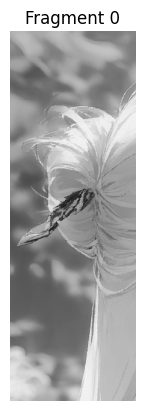

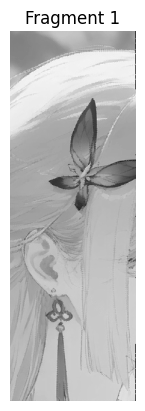

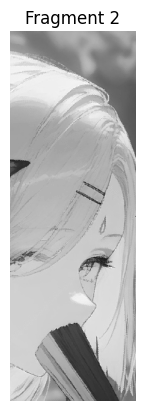

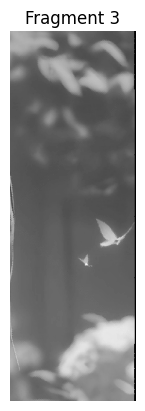

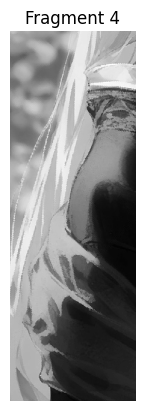

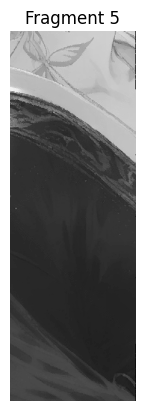

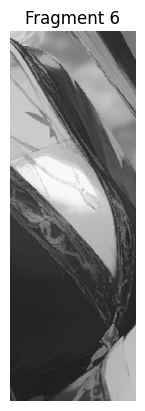

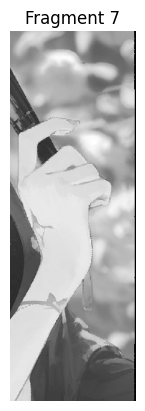

In [15]:
def sorting(array, index): #14
    sorted_list = []
    for i in index:
        sorted_list.append(array[i])
    return sorted_list

index_order = [0, 2, 4, 6, 1, 3, 5, 7]
sorted_pieces = sorting(final_results, index_order)

for i in range(len(sorted_pieces)):
    sorted_pieces[i] = sorted_pieces[i][ : , 215:-215]
    new_sorted_result = np.zeros((sorted_pieces[i].shape[0] + 390, sorted_pieces[i].shape[1]))
    new_sorted_result[390:, :] = sorted_pieces[i]
    sorted_pieces[i] = new_sorted_result
    sorted_pieces[i] = rotation_img(sorted_pieces[i], 90)
    sorted_pieces[i] = sorted_pieces[i][:, 2:-388]
  
for i in range(len(sorted_pieces)):
    if sorted_pieces[i].shape[0] != 200:
        sorted_pieces[i] = sorted_pieces[i][:, :-4]
    else:
        plt.imshow("Sort Failed")

for i in range(len(sorted_pieces)):
    plt.imshow(sorted_pieces[i], cmap='gray')
    plt.title(f"Fragment {i}")
    plt.axis("off")
    plt.show()


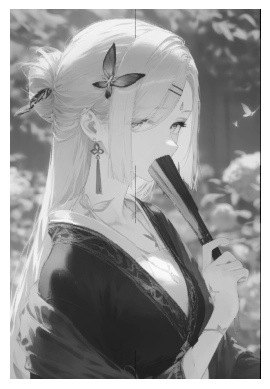

In [16]:
def merge_img(array, row, col): #15
    max_row = max([piece.shape[0] for piece in array])
    max_col = max([piece.shape[1] for piece in array])
    merged_canvas = np.zeros((row * max_row, col * max_col))
    x = 0
    y = 0
    for i in range(len(array)):
        height = array[i].shape[0]
        width = array[i].shape[1]

        merged_canvas[y:y + height, x:x + width] = array[i]

        if (i + 1) % col == 0:
            x = 0
            y += height
        else:
            x += width

    return merged_canvas

merged_image = merge_img(sorted_pieces, 2, 4)

plt.imshow(merged_image, cmap='gray')
plt.axis("off")
plt.show()


In [17]:
gray_values = [i for i in range(256)] #16
height, width = merged_image.shape

def histogram(image):
    gray_sum = np.zeros(256).astype(int)
    
    for i in range(height):
        for j in range(width):
            value = image[i, j]
            gray_sum[int(value)] += 1
    return gray_sum

# plt.bar(gray_values, histogram(merged_image))


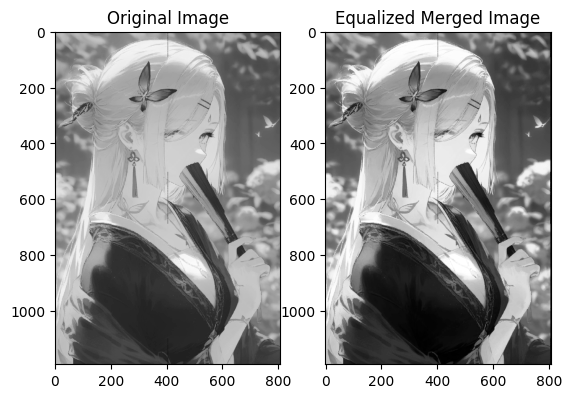

In [18]:
height, width = merged_image.shape #17
gray_sum = histogram(merged_image)
probabilities = np.zeros(256)

for i in range(256):
    probabilities[i] = gray_sum[i] / (height * width)

cumulative_sum = np.zeros(256)
cumulative_sum[0] = probabilities[0]

for i in range(1, 256):
    cumulative_sum[i] = cumulative_sum[i - 1] + probabilities[i]

equalized_image = merged_image.copy()
for i in range(height):
    for j in range(width):
        pixel_value = merged_image[i, j]
        new_pixel_value = round(cumulative_sum[int(pixel_value)] * 255)
        equalized_image[i, j] = new_pixel_value

plt.subplot(1, 2, 1)
plt.imshow(merged_image, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Merged Image')
plt.show()
